In [136]:
from sklearn.decomposition import KernelPCA
from sklearn.cross_validation import KFold
from sklearn import svm
import numpy as np
import random
import pandas as pd
import math
from sklearn.metrics import confusion_matrix as CM
import random
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib import pyplot as plt

In [27]:
from sklearn.datasets import load_digits

In [28]:
def crossValidation_forest(x,y):
    """
    version 3
    
    """
    crossErrors=[]
    confusion_matrix=[]
    #svc=svm.LinearSVC()
    rf=RFC(n_estimators=100,max_features=None)
    kf = KFold(x.shape[0], n_folds=5,shuffle=True)
    for train,test in kf:
        rf.fit(x.ix[train],y[train])
        prediction=rf.predict(x.ix[test])
        crossErrors.append(((prediction!=y[test]).sum())/float(len(y[test])))
        confusion_matrix.append(CM(y[test],prediction))
    return np.mean(crossErrors),confusion_matrix

In [204]:
def layer_rbf(x,y):
    """version 2"""
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    x_kpca=pd.DataFrame(kpca.fit_transform(x))
    
#     xT=np.concatenate((x,x_kpca),axis=1)
    
    crossErrors=[]
    for i in range(x.shape[1]):
        crossError,c=crossValidation_forest(x.drop(i,axis=1),y)
        crossErrors.append(crossError)
    
    drop=crossErrors.index(max(crossErrors))
    
    

    numOfFeatures=x_kpca.shape[1]
    
    addFeatureErrors=[]
    cms=[]
    for i in xrange(numOfFeatures):
        addcrossErrors,cm=crossValidation_forest(pd.concat((x.drop(drop,axis=1),x_kpca[i]),axis=1),y)
        addFeatureErrors.append(addcrossErrors)
        cms.append(cm)
       
    choice=addFeatureErrors.index(min(addFeatureErrors))
    
    if max(crossErrors)<min(addFeatureErrors):
        return x,addFeatureErrors,(max(crossErrors),min(addFeatureErrors)),True 
    else:
        result=pd.concat((x.drop(drop,axis=1),x_kpca[choice]),axis=1)
        result.columns=[i for i in range(result.shape[1])]
        return result,addFeatureErrors,(drop,choice),False                         

In [190]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('Error Bar_Chart')
    plt.show()

In [195]:
def plotdata(x,y):
    n=x.shape[1]
    fig,ax=plt.subplots(ncols=n,nrows=n)
    fig.set_size_inches(9,6)
    for i in xrange(n):
        for j in xrange(i+1):
            for t,color in zip(xrange(3),'rgb'):
                ax[i][j].scatter(x.ix[y == t,i],x.ix[y == t,j],c=color)
    plt.show()
#plotdata(x,y)

In [178]:
def printCM(cm):
    """
    print cm in a nice way
    """
    for i in cm:
        print i
        print 

In [179]:
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target

In [180]:
x=pd.DataFrame(x)

In [181]:
pd.DataFrame(x[2]).shape

(150, 1)

In [205]:
result,error,decision,flag=layer_rbf(x,y)

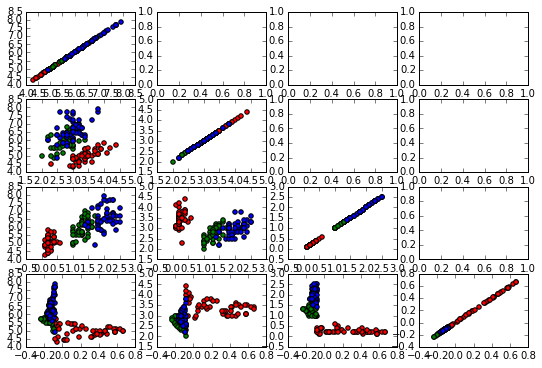

In [206]:
#result.rename(columns=[i for i in range(result.shape[1])],inplace=True)
plotdata(result,y)

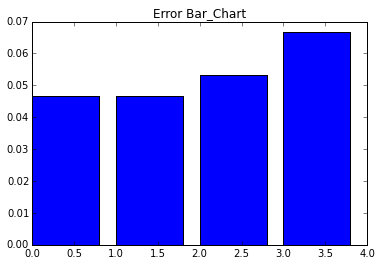

In [207]:
plotErr(error)
#print "Choice of Error: ", error[result.shape[1]]

In [208]:
for i in decision:
    print i

2
0


In [209]:
result1,e1,decision1,flag=layer_rbf(result,y)

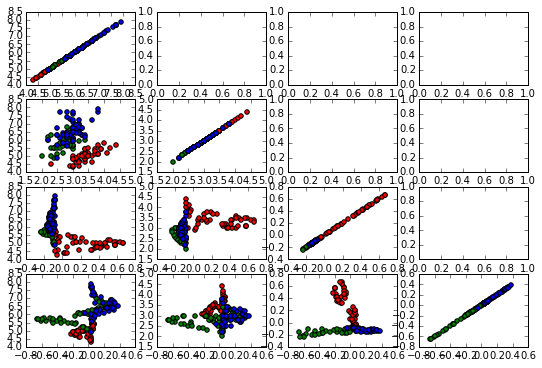

In [210]:
plotdata(result1,y)

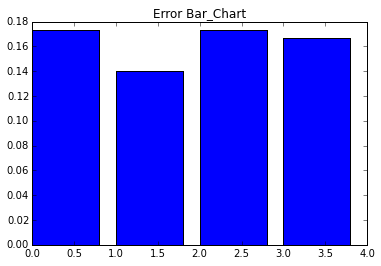

In [211]:
plotErr(e1)

In [212]:
for i in decision:
    print i

2
0


In [213]:
result2,e1,decision1,flag=layer_rbf(result1,y)

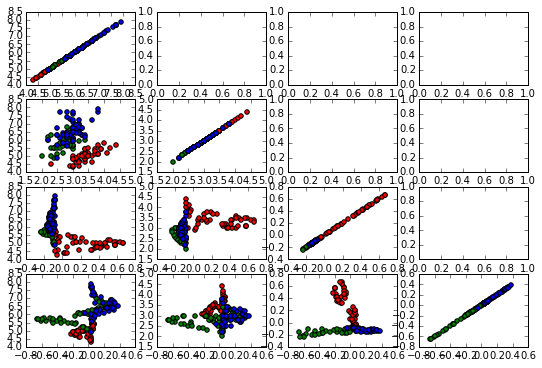

In [214]:
plotdata(result1,y)

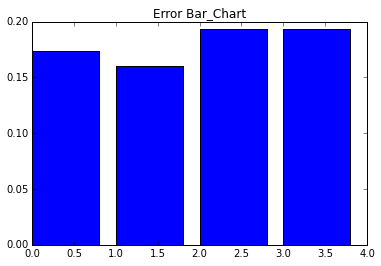

In [215]:
plotErr(e1)

In [216]:
for i in decision1:
    print i

3
1


In [217]:
result2,e2,decision2,flag=layer_rbf(result1,y)

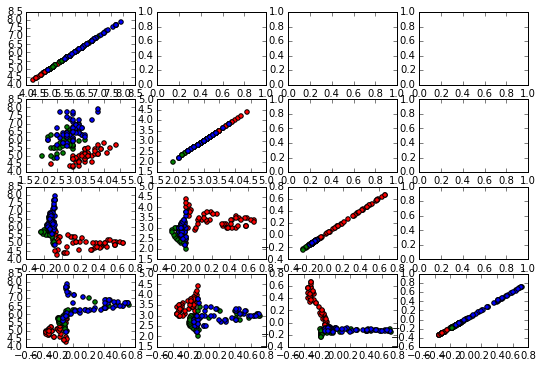

In [218]:
plotdata(result2,y)

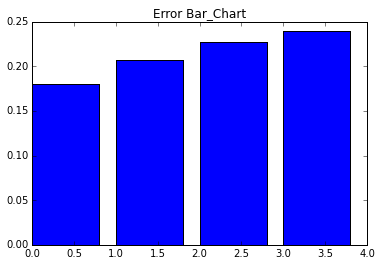

In [219]:
plotErr(e2)

In [220]:
for i in decision2:
    print i

3
0


In [221]:
result3,e3,decision3,flag=layer_rbf(result2,y)

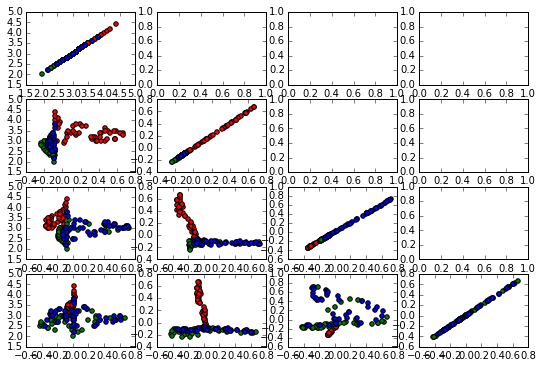

In [222]:
plotdata(result3,y)

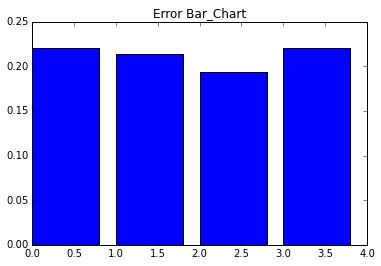

In [223]:
plotErr(e3)

In [224]:
for i in decision3:
    print i

0
2


In [225]:
result4,e4,decision4,flag=layer_rbf(result3,y)

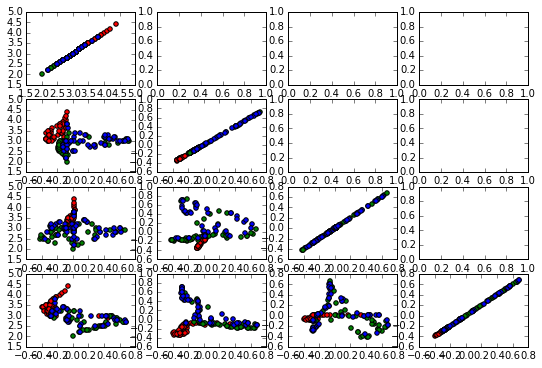

In [226]:
plotdata(result4,y)

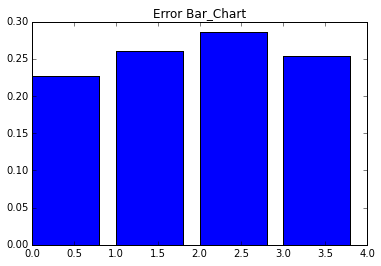

In [227]:
plotErr(e4)

In [228]:
for i in decision4:
    print i

1
0


In [229]:
result5,e5,decision5,flag=layer_rbf(result4,y)

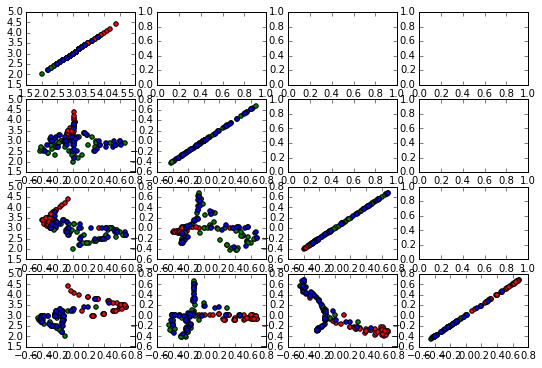

In [230]:
plotdata(result5,y)

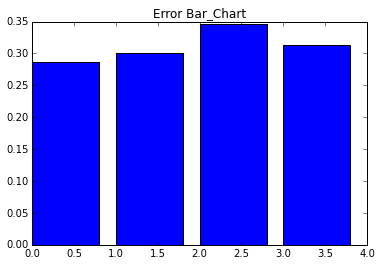

In [231]:
plotErr(e5)

In [232]:
for i in decision5:
    print i

1
0


In [233]:
result6,e6,decision6,flag=layer_rbf(result5,y)

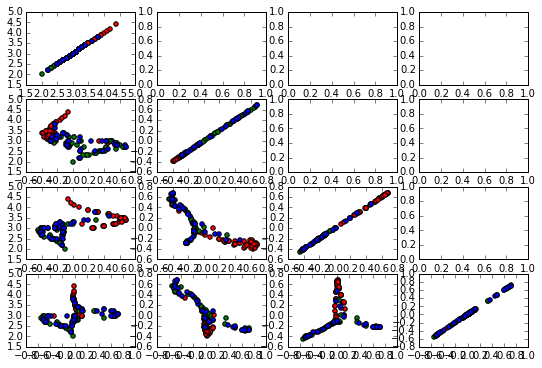

In [234]:
plotdata(result6,y)

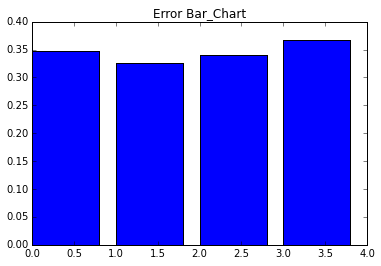

In [235]:
plotErr(e6)

In [236]:
for i in decision6:
    print i

1
1


In [237]:
result7,e7,decision7,flag=layer_rbf(result6,y)

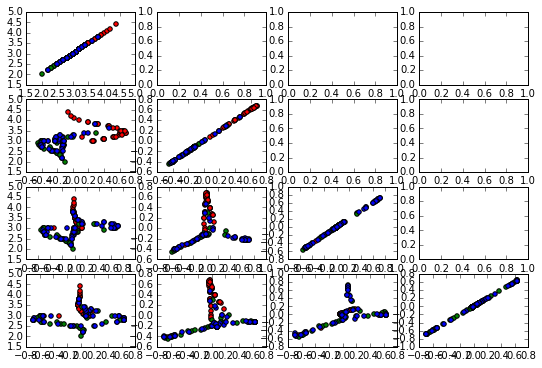

In [238]:
plotdata(result7,y)

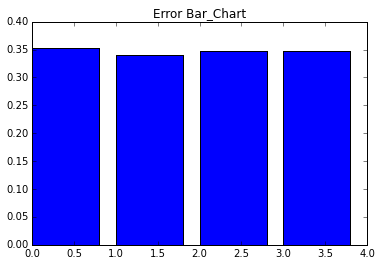

In [239]:
plotErr(e7)

In [240]:
for i in decision7:
    print i

1
1
